In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Бета распределение 
Параметры распределения, используемые для генерации случайных величин  $\alpha=2.0$ и $\beta=5.0$. В этом блоке также вычисляются средняя и дисперсия для данного распределения, основываясь на формулах из Википедии.
Также в этом блоки определяются параметры, которые будут использоваться в будущем для генерации нормального распределения  с параметрами ($\mu$, $\frac{\sigma^2}{n}$)

In [375]:
alpha =2.0
beta=5.0
beta_dist = sts.beta(a=alpha, b=beta)
beta_val=beta_dist.rvs(size=1000)

mean_global = alpha/(alpha+beta)
variance = (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))
sigma_global = np.sqrt(variance)

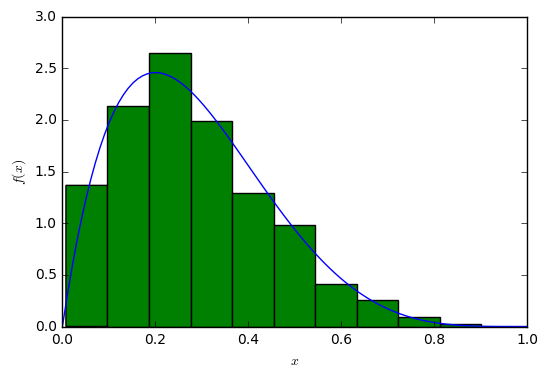

In [376]:
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(beta_val,bins=10, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Создание функции, генерирующую массив средних, заданной длины 
Входными переменными являются исходная выборка бета-распределения, объем выборки, по которым считается средняя и размер выборки средних

In [377]:
def gen_means_subm(beta_val,beta_val_sub_size,beta_val_sub_num):
    means = []
    for i in range(beta_val_sub_num):
        beta_val_sub = beta_val[np.random.randint(0,len(beta_val),beta_val_sub_size)]
        means.append(np.mean(beta_val_sub))
    return means


# Проверка ЦПТ при $n=3$
Здесь и в остальных случаях выполняются следующие действия:
происходит вызов написанной ранее функции, с помощью которой происходит генерация выборки средних значений исходного распределения, вычисление среднего значения и среднего отклонения (СО) приближенного распределения, генерируется нормальное распределение, используя параметры исходного распределения ($\mu$, $\frac{\sigma}{\sqrt{n}}$) и генерируется гистограмма и график плотности распределения средней случайной величины. 

Среднее теоретического распределения: 0.286
Среднее прилиженного распределения: 0.285
СО теоретического распределения: 0.071
СО прилиженного распределения: 0.072


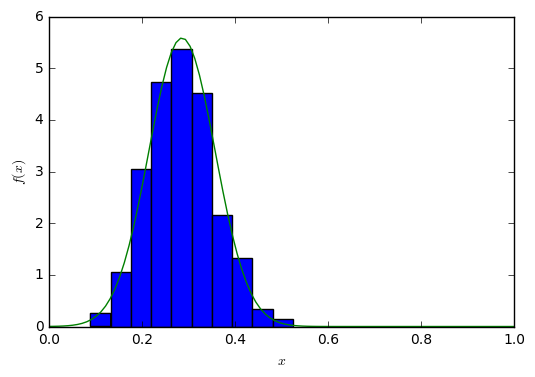

In [378]:
means_beta_5 = gen_means_subm(beta_val,5,1000)

mean_norm = np.mean(means_beta_5)
sigma_norm = np.std(means_beta_5, ddof=1)

norm = sts.norm(mean_global,sigma_global/np.sqrt(5))

print 'Среднее теоретического распределения:', round(mean_global, 3)
print 'Среднее прилиженного распределения:', round(mean_norm, 3)
print 'СО теоретического распределения:', round(sigma_global/np.sqrt(5), 3)
print 'СО прилиженного распределения:', round(sigma_norm, 3)
plt.hist(means_beta_5,bins=10, normed=True)
plt.plot(x,norm.pdf(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


# Проверка ЦПТ при $n=10$

Среднее теоретического распределения: 0.286
Среднее прилиженного распределения: 0.281
СО теоретического распределения: 0.051
СО прилиженного распределения: 0.052


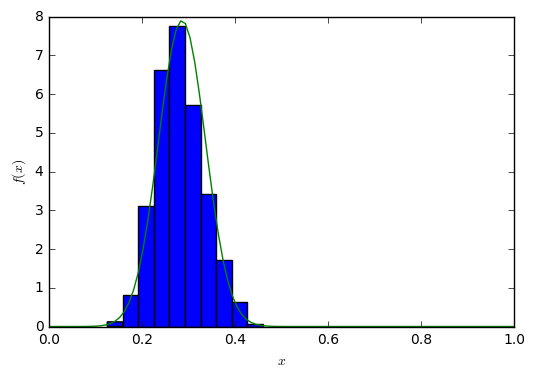

In [379]:
means_beta_10 = gen_means_subm(beta_val,10,1000)

mean_norm = np.mean(means_beta_10)
sigma_norm = np.std(means_beta_10, ddof=1)

norm = sts.norm(mean_global,sigma_global/np.sqrt(10))

print 'Среднее теоретического распределения:', round(mean_global, 3)
print 'Среднее прилиженного распределения:', round(mean_norm, 3)
print 'СО теоретического распределения:', round(sigma_global/np.sqrt(10), 3)
print 'СО прилиженного распределения:', round(sigma_norm, 3)
plt.hist(means_beta_10,bins=10, normed=True)
plt.plot(x,norm.pdf(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


# Проверка ЦПТ при $n=50$

Среднее теоретического распределения: 0.286
Среднее прилиженного распределения: 0.282
СО теоретического распределения: 0.023
СО прилиженного распределения: 0.023


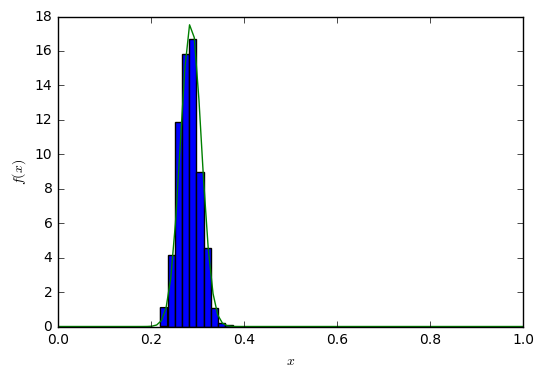

In [380]:
means_beta_50 = gen_means_subm(beta_val,50,1000)

mean_norm = np.mean(means_beta_50)
sigma_norm = np.std(means_beta_50, ddof=1)

norm = sts.norm(mean_global,sigma_global/np.sqrt(50))

print 'Среднее теоретического распределения:', round(mean_global, 3)
print 'Среднее прилиженного распределения:', round(mean_norm, 3)
print 'СО теоретического распределения:', round(sigma_global/np.sqrt(50), 3)
print 'СО прилиженного распределения:', round(sigma_norm, 3)
plt.hist(means_beta_50,bins=10, normed=True)
plt.plot(x,norm.pdf(x))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')



# Выводы
ЦПТ работает для бета-распределения (немного "скошенного" влево) с параметрами $\alpha=2.0$ и $\beta=5.0$. С увеличением выборки для подчета средних, растет точность приближенного приближения к теорическому значению, что видно из графиков и по значениям среднего и отклонения. 

Стоит отметить, что даже при $n=3$ ЦПТ дает хорошее приближение к теоретическому распределению.